In [1]:
import pandas as pd
import random
import numpy as np
from datetime import datetime, timedelta

# Membuat daftar desa, kecamatan, dan kabupaten
desa = []
kecamatan = []
kabupaten = []

# Mengisi daftar desa, kecamatan, dan kabupaten sesuai dengan deskripsi
for i in range(1, 251):
    desa.append(f"Desa {i}")
    if i <= 25:
        kecamatan.append("A")
        kabupaten.append("Alfa")
    elif i <= 50:
        kecamatan.append("B")
        kabupaten.append("Alfa")
    elif i <= 75:
        kecamatan.append("C")
        kabupaten.append("Beta")
    elif i <= 100:
        kecamatan.append("D")
        kabupaten.append("Beta")
    elif i <= 125:
        kecamatan.append("E")
        kabupaten.append("Delta")
    elif i <= 150:
        kecamatan.append("F")
        kabupaten.append("Delta")
    elif i <= 175:
        kecamatan.append("G")
        kabupaten.append("Gamma")
    elif i <= 200:
        kecamatan.append("H")
        kabupaten.append("Gamma")
    elif i <= 225:
        kecamatan.append("I")
        kabupaten.append("Lamda")
    else:
        kecamatan.append("J")
        kabupaten.append("Lamda")

# Membuat kolom jumlah kendaraan dengan angka random antara 0-100, 0, atau NaN
jumlah_kendaraan = []
for _ in range(250):
    random_num = random.randint(0, 2)
    if random_num == 0:
        jumlah_kendaraan.append(0)
    elif random_num == 1:
        jumlah_kendaraan.append(np.nan)
    else:
        jumlah_kendaraan.append(random.randint(1, 150))

# Membuat kolom datetime dengan nilai random dalam rentang 2022-01-01 hingga 2022-12-31
start_date = datetime(2022, 1, 1)
end_date = datetime(2022, 12, 31)
date_range = end_date - start_date
datetimes = [start_date + timedelta(days=random.randint(0, date_range.days)) for _ in range(250)]

# Membuat DataFrame
data = pd.DataFrame({
    "Desa": desa,
    "Kecamatan": kecamatan,
    "Kabupaten": kabupaten,
    "Datetime": datetimes,
    "Jumlah Kendaraan": jumlah_kendaraan
})

# Menampilkan DataFrame
print(data.head())


     Desa Kecamatan Kabupaten   Datetime  Jumlah Kendaraan
0  Desa 1         A      Alfa 2022-12-17               NaN
1  Desa 2         A      Alfa 2022-02-13               NaN
2  Desa 3         A      Alfa 2022-02-10               0.0
3  Desa 4         A      Alfa 2022-01-30               NaN
4  Desa 5         A      Alfa 2022-05-19               NaN


In [2]:
data.head()

,Desa,Kecamatan,Kabupaten,Datetime,Jumlah Kendaraan
0,Desa 1,A,Alfa,2022-12-17,NaN
1,Desa 2,A,Alfa,2022-02-13,NaN
2,Desa 3,A,Alfa,2022-02-10,0.0
3,Desa 4,A,Alfa,2022-01-30,NaN
4,Desa 5,A,Alfa,2022-05-19,NaN


In [3]:
data.tail()

,Desa,Kecamatan,Kabupaten,Datetime,Jumlah Kendaraan
245,Desa 246,J,Lamda,2022-11-16,18.0
246,Desa 247,J,Lamda,2022-12-29,0.0
247,Desa 248,J,Lamda,2022-05-12,120.0
248,Desa 249,J,Lamda,2022-02-06,0.0
249,Desa 250,J,Lamda,2022-11-25,NaN


In [7]:
import pandas as pd
import random
import numpy as np
import zipfile
from datetime import datetime, timedelta

# Membuat DataFrame
# Kode untuk menghasilkan DataFrame

# Simpan DataFrame ke dalam file CSV
data.to_csv('data.csv', index=False)

# Membuat file ZIP dan menambahkan file CSV ke dalamnya
with zipfile.ZipFile('data.zip', 'w') as zipf:
    zipf.write('data.csv')

print("Data berhasil disimpan dalam file ZIP.")


Data berhasil disimpan dalam file ZIP.


# Scenario

## 1.Read

In [53]:
import zipfile
import os
import shutil
from datetime import datetime

# Path ke file ZIP
zip_path = "data.zip"

# Ekstrak file ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()

# Cari file CSV di dalam folder yang diekstrak
csv_file = None
for root, dirs, files in os.walk("."):
    for file in files:
        if file.endswith(".csv"):
            csv_file = os.path.join(root, file)
            break

# Jika file CSV ditemukan
if csv_file:
    # Buat nama file baru dengan format "kendaraan-datetime.csv"
    now = datetime.now()
    timestamp = now.strftime("%Y%m%d%H%M%S")
    new_filename = f"kendaraan-{timestamp}.csv"
    
    # Path tujuan untuk menyimpan file baru
    output_dir = "./output"
    os.makedirs(output_dir, exist_ok=True)
    output_path = os.path.join(output_dir, new_filename)
    
    # Salin file CSV ke direktori output
    shutil.copy(csv_file, output_path)
    print(f"File CSV berhasil disalin ke {output_path}")
else:
    print("File CSV tidak ditemukan dalam file ZIP.")


File CSV berhasil disalin ke ./output\kendaraan-20230610045000.csv


## 2. Cleaning

In [9]:
import pandas as pd
import numpy as np

# Membaca file CSV
df = pd.read_csv('data.csv')

# Menghitung jumlah data NaN
nan_count = df.isna().sum().sum()

# Menghitung jumlah data yang bernilai 0
zero_count = (df == 0).sum().sum()

print(f"Jumlah data NaN: {nan_count}")
print(f"Jumlah data yang bernilai 0: {zero_count}")


Jumlah data NaN: 87
Jumlah data yang bernilai 0: 91


In [12]:
import pandas as pd
import numpy as np

# Membaca file CSV
df = pd.read_csv('data.csv')

# Menghapus baris yang mengandung nilai NaN
df = df.dropna()

# Mengganti nilai 0 dengan NaN
df = df.replace(0, np.nan)

# Menghapus baris yang mengandung nilai NaN setelah perubahan
df = df.dropna()


In [13]:
# Menghitung jumlah data NaN
nan_count = df.isna().sum().sum()

# Menghitung jumlah data yang bernilai 0
zero_count = (df == 0).sum().sum()

print(f"Jumlah data NaN: {nan_count}")
print(f"Jumlah data yang bernilai 0: {zero_count}")


Jumlah data NaN: 0
Jumlah data yang bernilai 0: 0


In [46]:
output_all="./output/"

# Menyimpan DataFrame yang sudah dihapus datanya ke file CSV baru
#df.to_csv('data_cleaned.csv', index=False)

cleaned_csv='data_cleaned.csv'
path_cleaned_csv=output_all+cleaned_csv
df.to_csv(path_cleaned_csv, index=False)

In [15]:
df.head()

,Desa,Kecamatan,Kabupaten,Datetime,Jumlah Kendaraan
6,Desa 7,A,Alfa,2022-11-14,129.0
16,Desa 17,A,Alfa,2022-02-10,140.0
20,Desa 21,A,Alfa,2022-11-27,72.0
27,Desa 28,B,Alfa,2022-06-01,105.0
29,Desa 30,B,Alfa,2022-06-21,29.0


## 3. Visual

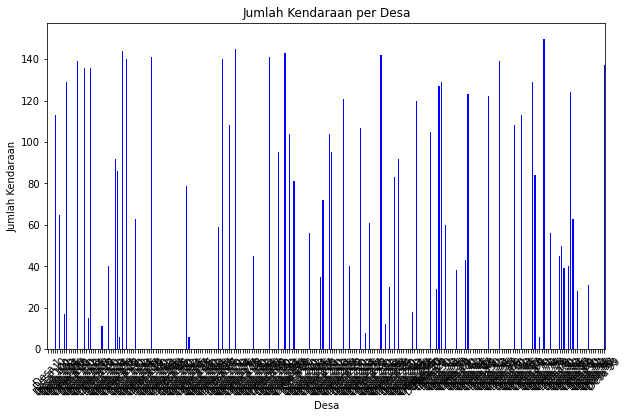

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung jumlah kendaraan per desa
jumlah_kendaraan_per_desa = df.groupby('Desa')['Jumlah Kendaraan'].sum()

# Membuat grafik batang
plt.figure(figsize=(10, 6))
jumlah_kendaraan_per_desa.plot(kind='bar', color='blue')
plt.xlabel('Desa')
plt.ylabel('Jumlah Kendaraan')
plt.title('Jumlah Kendaraan per Desa')
plt.xticks(rotation=45)
plt.savefig(r'.\output\desa.jpg')
plt.show()


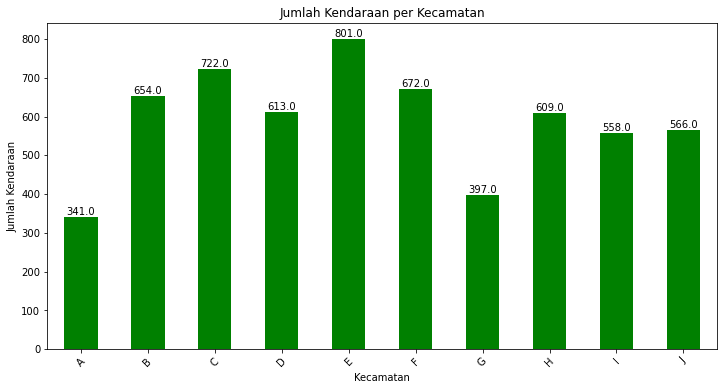

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung jumlah kendaraan per kecamatan
jumlah_kendaraan_per_kecamatan = df.groupby('Kecamatan')['Jumlah Kendaraan'].sum()

# Membuat grafik batang
plt.figure(figsize=(12, 6))
jumlah_kendaraan_per_kecamatan.plot(kind='bar', color='green')

# Menampilkan angka di atas setiap batang
for i, v in enumerate(jumlah_kendaraan_per_kecamatan):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.xlabel('Kecamatan')
plt.ylabel('Jumlah Kendaraan')
plt.title('Jumlah Kendaraan per Kecamatan')
plt.xticks(rotation=45)
plt.savefig(r'.\output\kecamatan.jpg')
plt.show()


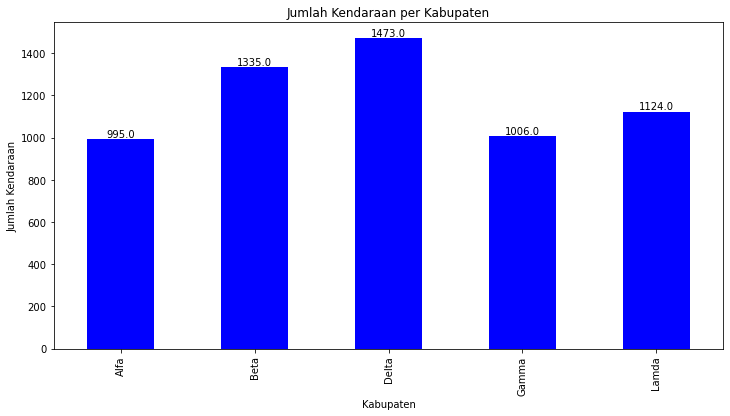

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung jumlah kendaraan per kabupaten
jumlah_kendaraan_per_kabupaten = df.groupby('Kabupaten')['Jumlah Kendaraan'].sum()

# Membuat grafik batang
plt.figure(figsize=(12, 6))
jumlah_kendaraan_per_kabupaten.plot(kind='bar', color='blue')

# Menampilkan angka di atas setiap batang
for i, v in enumerate(jumlah_kendaraan_per_kabupaten):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.xlabel('Kabupaten')
plt.ylabel('Jumlah Kendaraan')
plt.title('Jumlah Kendaraan per Kabupaten')
plt.xticks(rotation=90)

# Menyimpan grafik dalam format JPG
plt.savefig(r'.\output\kabupaten.jpg')
plt.show()


## 3. Group By SUM and MEAN

In [47]:
# Melakukan groupby pada tingkat kecamatan
df_kecamatan = df.groupby('Kecamatan').agg({'Jumlah Kendaraan': 'sum'})

# Menampilkan dataframe hasil groupby
print(df_kecamatan)

# Simpan DataFrame ke dalam file CSV
df_kecamatan_csv='df_kecamatan_csv.csv'
path_kecamatan_csv=output_all + df_kecamatan_csv
data.to_csv(path_kecamatan_csv, index=False)

           Jumlah Kendaraan
Kecamatan                  
A                     341.0
B                     654.0
C                     722.0
D                     613.0
E                     801.0
F                     672.0
G                     397.0
H                     609.0
I                     558.0
J                     566.0


In [28]:
# Melakukan groupby pada tingkat kecamatan
df_kecamatan_mean = df.groupby('Kecamatan').agg({'Jumlah Kendaraan': 'mean'})

# Menampilkan dataframe hasil groupby
print(df_kecamatan_mean)

           Jumlah Kendaraan
Kecamatan                  
A                 22.733333
B                 43.600000
C                 42.470588
D                 36.058824
E                 57.214286
F                 35.368421
G                 26.466667
H                 43.500000
I                 37.200000
J                 25.727273


In [48]:
# Melakukan groupby pada tingkat kabupaten
df_kabupaten = df.groupby('Kabupaten').agg({'Jumlah Kendaraan': 'sum'})

# Menampilkan dataframe hasil groupby
print(df_kabupaten)

# Simpan DataFrame ke dalam file CSV
df_kabupaten_csv='df_kabupaten_csv.csv'
path_kabupaten_csv=output_all + df_kabupaten_csv
data.to_csv(path_kabupaten_csv, index=False)

           Jumlah Kendaraan
Kabupaten                  
Alfa                  995.0
Beta                 1335.0
Delta                1473.0
Gamma                1006.0
Lamda                1124.0


In [30]:
# Melakukan groupby pada tingkat kabupaten
df_kabupaten = df.groupby('Kabupaten').agg({'Jumlah Kendaraan': 'mean'})

# Menampilkan dataframe hasil groupby
print(df_kabupaten)

           Jumlah Kendaraan
Kabupaten                  
Alfa              33.166667
Beta              39.264706
Delta             44.636364
Gamma             34.689655
Lamda             30.378378


## 4. Range

In [76]:
#cd C:\\Users\\Singgih\\Downloads\\Programs\\automation3
#cd output

C:\Users\Singgih\Downloads\Programs\automation3


In [77]:
#pwd

'C:\\Users\\Singgih\\Downloads\\Programs\\automation3'

In [78]:
df_range=pd.read_csv(".\output\data_cleaned.csv")
df_range.head()

,Desa,Kecamatan,Kabupaten,Datetime,Jumlah Kendaraan
0,Desa 7,A,Alfa,2022-11-14,129.0
1,Desa 17,A,Alfa,2022-02-10,140.0
2,Desa 21,A,Alfa,2022-11-27,72.0
3,Desa 28,B,Alfa,2022-06-01,105.0
4,Desa 30,B,Alfa,2022-06-21,29.0


In [80]:
# Membuat fungsi untuk menentukan level berdasarkan jumlah kendaraan
def get_level(jumlah_kendaraan):
    if jumlah_kendaraan <= 50:
        return 1
    elif jumlah_kendaraan <= 100:
        return 2
    else:
        return 3

# Menambahkan kolom "level" dengan menggunakan metode apply
df_range['level'] = df_range['Jumlah Kendaraan'].apply(get_level)

# Menampilkan dataframe hasil penambahan kolom "level"
print(df_range)

        Desa Kecamatan Kabupaten    Datetime  Jumlah Kendaraan  level
0     Desa 7         A      Alfa  2022-11-14             129.0      3
1    Desa 17         A      Alfa  2022-02-10             140.0      3
2    Desa 21         A      Alfa  2022-11-27              72.0      2
3    Desa 28         B      Alfa  2022-06-01             105.0      3
4    Desa 30         B      Alfa  2022-06-21              29.0      1
..       ...       ...       ...         ...               ...    ...
67  Desa 237         J     Lamda  2022-05-28              30.0      1
68  Desa 239         J     Lamda  2022-06-07              83.0      2
69  Desa 240         J     Lamda  2022-07-26              92.0      2
70  Desa 246         J     Lamda  2022-11-16              18.0      1
71  Desa 248         J     Lamda  2022-05-12             120.0      3

[72 rows x 6 columns]


<Figure size 1296x1080 with 0 Axes>

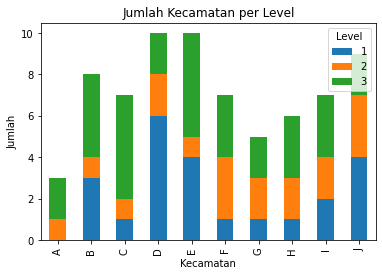

In [87]:
# Melakukan groupby pada tingkat kecamatan dan level, menghitung jumlah kecamatan per level
df_level = df_range.groupby(['Kecamatan', 'level']).size().unstack()

# Menampilkan grafik batang
plt.figure(figsize=(18, 15))
df_level.plot(kind='bar', stacked=True)
plt.xlabel('Kecamatan')
plt.ylabel('Jumlah')
plt.title('Jumlah Kecamatan per Level')
plt.legend(title='Level')

# Menyimpan grafik dalam format JPG
plt.savefig(r'.\output\Kec_Level.jpg')
plt.show()

<Figure size 1296x1080 with 0 Axes>

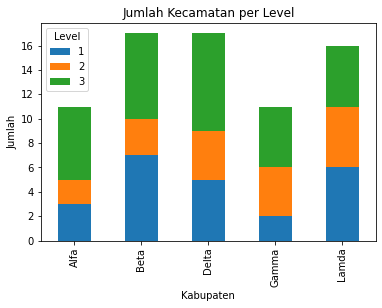

In [88]:
# Melakukan groupby pada tingkat kabupaten dan level, menghitung jumlah kabupaten per level
df_level = df_range.groupby(['Kabupaten', 'level']).size().unstack()

# Menampilkan grafik batang
plt.figure(figsize=(18, 15))
df_level.plot(kind='bar', stacked=True)
plt.xlabel('Kabupaten')
plt.ylabel('Jumlah')
plt.title('Jumlah Kecamatan per Level')
plt.legend(title='Level')

# Menyimpan grafik dalam format JPG
plt.savefig(r'.\output\Kab_Level.jpg')
plt.show()